<big>**基本介绍**</big>

SVM是找到一个唯一超平面来划分数据，适用于样本数较少时的分类问题。

假设对于线性可分的数据，存在超平面将两类数据分开。为了更好地分开，尽可能让数据集中所有样本点到超平面的距离更远。

点到超平面的函数距离为：
$$l_i=y_i(\omega^T \vec{x_i} + b) $$


点到超平面的几何距离为：
$$r_i=\frac{1}{||\omega||}y_i(\omega^T \vec{x_i} + b) $$

函数间隔为:$l=\underset {i=1...N}{min} 2*l_i$，几何间隔为:$r=\underset{i=1...N}{min}2*r_i$，

因此为了使所有样本点到超平面的距离最远，我们需要
$$max_{w,b}r\\
s.t. \frac{2}{||\omega||}y_i(\omega^T \vec{x_i} + b)\geq r,i=1,...,N$$

为了方便，直接令函数间隔$l=|w|r=1$，所以相当于优化
$$max_{w,b}\frac{2}{||\omega||}\\
s.t. y_i(\omega^T \vec{x_i} + b) - 1\geq 0,i=1,...,N$$

相当于求$$min_{w,b}\frac{||\omega||}{2}\\
s.t. y_i(\omega^T \vec{x_i} + b) - 1\geq 0,i=1,...,N$$

又$|\omega|=\sqrt{\omega_1^2+\omega_2^2+...+\omega_n^2}=\sqrt{\omega^T \omega}$，则优化目标相当于，
$$min_{w,b}\frac{1}{2}\omega^T \omega\\
s.t. y_i(\omega^T \vec{x_i} + b) - 1 \geq 0,i=1,...,N$$


因此，优化问题就变成了有约束的凸二次规划问题。

----
P.S. 有关凸优化的内容可以查看 https://zhuanlan.zhihu.com/p/100041443

拉格朗日乘数法(Lagrange Multiplier)和KKT(Karush-Kuhn-Tucker)条件是求解约束优化问题的重要方法.

**在有等式约束时使用拉格朗日乘子法，在有不等约束时使用KKT条件，然后再用拉格朗日乘数法。**

前提是：只有当目标函数为凸函数时，使用这两种方法才保证求得的是最优解。

拉格朗日乘数法是一种优化算法，主要运用于解决优化问题，它的基本思想就是用过拉格朗日乘子来把含有m个变量和l个约束条件的约束优化问题转换成含有（m+l）个变量的无约束优化问题


**Q1:为什么拉格朗日乘数法可以解决等式约束凸优化问题？**
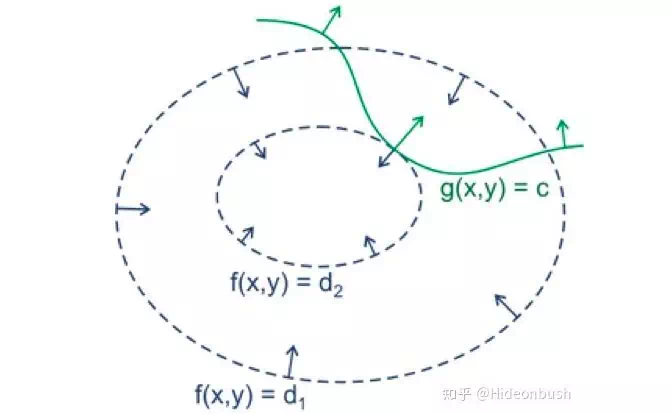
如上图。蓝色虚线是目标函数 f(x,y) 的等高线，绿色实现 g(x,y)=c 是约束条件。图中，目标函数和条件函数有三种情况：

1、相离

无交点，无解，不可以。

2、相交

两个函数相交的才是两个函数的解，但是相交得到的一定不是最优值，因为相交意味着肯定还存在其它的等高线在该条等高线的内部或者外部，使得新的等高线与目标函数的交点的值更大或者更小。

3、相切

图中，等高线与条件函数相切时候，只有一个交点，是可行解，且是最优的。

当等高线与条件函数在可行解处（相切时候）的梯度平行有下式：
$$\nabla f(x,y)=-\nabla \lambda(g(x,y)-c)$$

而在拉格朗日乘数法式子中，$$L(x,y, \lambda)=f(x,y)+\lambda (g(x,y)-c)$$

令L导数为0：
$$\nabla L(x,y, \lambda)=\nabla f(x,y) + \nabla {\lambda (g(x,y)-c)}=0$$

**L的导数为0时，和等高线与条件函数相切时的梯度关系式相同**。

因此，可以用拉格朗日乘数法来解决等式约束凸优化问题。

---------------
**Q2:如何用拉格朗日乘数法解决SVM的求解问题**

已知SVM的优化目标是：
$$min_{w,b}\frac{1}{2}\omega^T \omega\\
s.t. y_i(\omega^T \vec{x_i} + b) - 1 \geq 0,i=1,...,N$$

套入凸优化问题模板中，可以得到：

$
f(\omega, b)=\frac{1}{2}\omega^T \omega \\
g(\omega, b)=1 - y_i(\omega^T \vec{x_i} + b) \leq 0, i=1,2...,N \\
h(\omega, b)=0
$

所以SVM的拉格朗日表达式为：
$$
L(\omega, b, \alpha)=\frac{1}{2}\omega^T \omega + \sum_i^N{\alpha_i(1 - y_i(\omega^T \vec{x_i} + b))}, i=1,2...,N $$
其中$\alpha = \{\alpha_1, \alpha_2,....,\alpha_N\}$,且$\alpha_i \geq 0$

**如何把拉格朗日函数和原问题关联起来，即为什么拉格朗日函数等价于原问题?**
$$
\underset{\omega,b}{min}\underset{\alpha}{max}L(\omega, b, \alpha)=\\
\underset{\omega,b}{min}\underset{\alpha}{max}\bigg(\frac{1}{2}\omega^T \omega + \sum_i^N{\alpha_i(1 - y_i(\omega^T \vec{x_i} + b))}\bigg)=\\
\underset{\omega,b}{min}\bigg(\frac{1}{2}\omega^T \omega + \underset{\alpha}{max}\sum_i^N{\alpha_i(1 - y_i(\omega^T \vec{x_i} + b))}\bigg)=\\
\underset{\omega,b}{min}\bigg(\frac{1}{2}\omega^T \omega + 
\begin{cases}
0& 若\omega,b 满足约束\\
\infty& 其他
\end{cases}\bigg)= \\
\underset{\omega,b}{min} \frac{1}{2}\omega^T \omega，且\omega,b满足约束
$$

从上面的推导可以看到，在满足约束时，原问题$\underset{\omega, b}{min}\frac{1}{2}\omega^T \omega$与拉格朗日形式$
\underset{\omega,b}{min}\underset{\alpha}{max}L(\omega, b, \alpha)$ 是等价的。

所以，此时，**原问题就可以转化成**
$$
\underset{\omega,b}{min}\underset{\alpha}{max}L(\omega, b, \alpha)$$



**Q3:为什么要转换成对偶问题**

如果原问题约束多变量少，转换成对偶问题，就是约束少变量多，这样就能降低计算量。**在SVM中，就是令内层min变成无约束函数，从而利用求导求得参数值。**

如果原问题是求目标函数最小化，那么对偶问题就是在寻找原问题目标函数的下界，也就是对偶问题的上界。比如：
$$
\underset{\alpha}{max}\underset{\omega,b}{min}L(\omega,b,\alpha) 
\leq 
\underset{\omega,b}{min}\underset{\alpha}{max}L(\omega,b,\alpha)
$$

即，需要求解对偶问题：
$$\underset{\alpha}{max}\underset{\omega,b}{min}\big(\frac{1}{2}\omega^T \omega + \sum_i^N{\alpha_i(1 - y_i(\omega^T \vec{x_i} + b))}\big), \alpha_i \geq 0$$
此时，对$\omega,b$来说，里面求最小值是一件**无约束问题**，直接令导数为0即可得到极值。
$$
\begin{cases}
\frac{\partial L}{\partial \omega}=\omega + \sum_i^N{\alpha_i*(-y_i)\vec{x_i}} = 0 \\
\frac{\partial L}{\partial b}=\sum_i^N{\alpha_i*(-y_i)} = 0
\end{cases}
\Rightarrow
\begin{cases}
\omega=\sum_{i=1}^N{\alpha_i*y_i*\vec{x_i}}\\
\sum_i^N{\alpha_i*y_i} = 0
\end{cases}
$$

将$\omega$代入到对偶问题中，可得
$$
\underset{\alpha}{max}\big(\frac{1}{2}\omega^T \omega + \sum_i^N{\alpha_i(1 - y_i(\omega^T \vec{x_i} + b))}\big)=\\
\underset{\alpha}{max}\big(\frac{1}{2}\omega^T \omega + \sum_{i=1}^N{\alpha_i} - \sum_{i=1}^N{\alpha_i y_i \omega \vec{x_i}} - \sum_{i=1}^N{\alpha_i y_i b}\big)=\\
\underset{\alpha}{max}\big(\frac{1}{2}\omega^T \omega + \sum_{i=1}^N{\alpha_i} - \omega^T \omega - b\sum_{i=1}^N{\alpha_i y_i}\big)=\\
\underset{\alpha}{max}\big(-\frac{1}{2}\omega^T \omega + \sum_{i=1}^N{\alpha_i}\big)=\\
正负号对换，最大改最小：\\
\underset{\alpha}{min}\big(\frac{1}{2}\omega^T \omega - \sum_{i=1}^N{\alpha_i}\big)=\\
\underset{\alpha}{min}\big(\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N{(\alpha_i\alpha_jy_iy_j\vec{x_i}^T \vec{x_j}})- \sum_{i=1}^N{\alpha_i}\big)\\
s.t.\sum_i^N{\alpha_i*y_i} = 0, \alpha_i \geq 0
$$


最终，通过二次规划或者SMO等算法求解$\alpha_i$即可。

P.S. 对偶问题的理解参考 https://zhuanlan.zhihu.com/p/31652569

-----
**Q4:如何求解$\alpha$向量？**

由于$\sum_{i=1}^N\sum_{j=1}^N{(\alpha_i\alpha_jy_iy_j\vec{x_i}^T \vec{x_j}})$的复杂度是$O(N^2)$，当N很大时，使用二次规划方法的计算开销过大。

因此采用SMO算法，充分**利用支持向量的特点**。SMO的思路是**坐标下降**。


坐标下降是一种寻找局部最优的方法，在多维特征中，固定其他维度，只改变某一维度，并求得使得函数局部最大/小的的该维度的参数值。
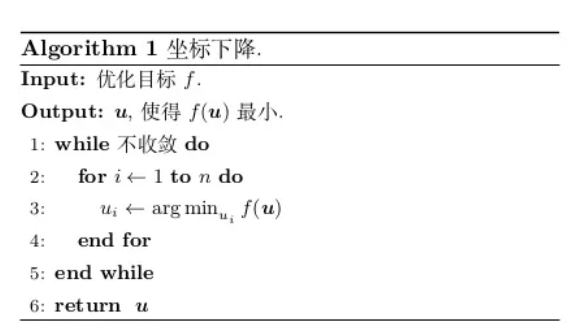

另外，也可以采用Peagsos算法，这是对于线性支持向量机使用的基于梯度的方法。（原因是，软间隔支持向量机又可以表示为铰链损失+l2正则，是可微的，因而可以用梯度下降法。

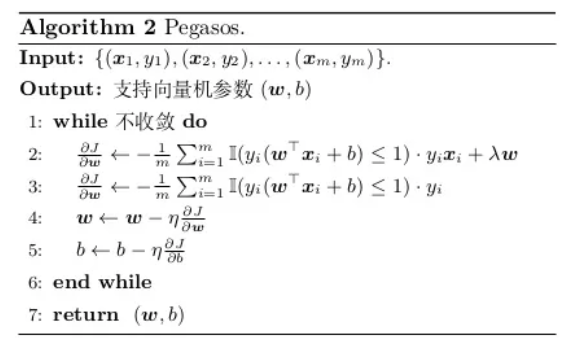


---
而在SVM中，由于存在约束$\sum_{i=1}^N{\alpha_i y_i}=0$，因此当N-1个维度固定时，剩下的那个维度也将会是固定的，因此，选取2个参数，即为$\delta 和 \gamma$。优化目标为：

$$\underset{\alpha_{\delta}, \alpha_{\gamma}}{min}\big(\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N{(\alpha_i\alpha_jy_iy_j\vec{x_i}^T \vec{x_j}})- \sum_{i=1}^N{\alpha_i}\big)=\\
\underset{\alpha_{\delta}, \alpha_{\gamma}}{min}\big(\frac{1}{2}(\sum_{i\neq\delta,\gamma}{(\alpha_i\alpha_jy_iy_j\vec{x_i}^T \vec{x_j})} + \alpha_{\delta}y_{\delta}\vec{x_{\delta}}+\alpha_{\gamma}y_{\gamma}\vec{x_{\gamma}}) (\sum_{j\neq\delta,\gamma}{(\alpha_i\alpha_jy_iy_j\vec{x_i}^T \vec{x_j})} + \alpha_{\delta}y_{\delta}\vec{x_{\delta}}+\alpha_{\gamma}y_{\gamma}\vec{x_{\gamma}})-(\alpha_{\delta} + \alpha_{\gamma})\big)=\\
\underset{\alpha_{\delta}, \alpha_{\gamma}}{min}\big(\frac{1}{2}({\alpha_{\delta}^2 y_{\delta}^2\phi^T(x)\phi(x)}+\alpha_{\gamma}^2 y_{\gamma}^2\phi^T(x)\phi(x) +2\alpha_{\delta}\alpha_{\gamma}y_{\delta}y_{\gamma}\phi^T(x)\phi(x))-(\alpha_{\delta} + \alpha_{\gamma})\big)\\
s.t.\alpha_{\delta}y_{\delta}+\alpha_{\gamma}y_{\gamma}=c，其中c=0-\sum_{i\neq \delta,\gamma}{\alpha_iy_i\vec{x_i}^T\vec{x_i}}
$$

----
**Q5:线性支持向量机SVM的表达式为？**
$$h(x)=sign(\sum_{i \in SV}\alpha_i y_i \vec{x_i}^T \vec{x} + b)$$
其中，$SV$是支持向量，即$\alpha_i>0$对应的向量集合。

**Q6:SVM表达式中的$\omega和b$如何用$\alpha$来表示？**
$$\omega=\sum_{i=1}^N{\alpha_iy_i\vec{x_i}}$$

b的求解可以通过支持向量来得到：
$$y_k(\omega\vec{x_k}+b)=1，且\omega=\sum_{i=1}^N{\alpha_iy_i\vec{x_i}}，y_k=1/-1，则\\
b=y_k-\omega\vec{x_k}，即\\
b=y_k-\sum_{i=1}^N{\alpha_iy_i\vec{x_i}^T}\vec{x_k}\\
而只有支持向量的\alpha\neq0，所以：
b=y_k-\sum_{i \in VC}{\alpha_iy_i\vec{x_i}^T}\vec{x_k}\\
$$
实际上，b是所有支持向量求得结果的平均值。

**Q7:SVM的KKT条件是什么？**

1、原始约束：$1 - y_i(\omega_i\vec{x_i}+b) \leq 0, i=1,2,...,N$

2、对偶约束：$\alpha_i \geq 0, i=1,2,...,N$

3、原始规划内层max有解：$\alpha_i(1 - y_i(\omega^T \vec{x_i} + b)=0$

4、对偶规划内层min有解：$\omega=\sum_{i=1}^N{\alpha_iy_i\vec{x_i}}, \sum_{i=1}^N{\alpha_iy_i}=0$

---------------
**Q7:线性不可分时怎么处理？**

存在定理：若数据在空间$R^d$中线性不可分，则存在空间$R^{d'}$且d'>d，使得在高维空间中线性可分。所以原问题就转换成：
$$\underset{\omega,b}{min}\frac{1}{2}\omega^T\omega\\
s.t. 1-y_i(\omega^T{\phi(x)+b)}\leq0$$
转换成对偶问题，则：
$$\underset{\alpha}{min}\frac{1}{2}\sum_{i=1}^N{\alpha_i\alpha_jy_iy_j\phi^T(x)\phi(x)}-\sum_{i=1}^N{\alpha_i}$$

被映射到高维空间后，特征向量总以內积的形式存在，即$\phi^T(x)\phi(x)$，若先计算特征映射后的值，再去计算內积，则计算量过多。因此，选取一些有一定特性的函数，**这些函数能够将特征映射和计算內积压缩成一步**，这些函数称为核函数。

令$\kappa(x)=\phi^T(x)\phi(x)$，即核函数是两个向量的內积。

一般来说，核函数有线性核、高斯核、多项式核等。

1、高斯核，比如$\kappa(x_i,x_j)=e^{-(x_i-x_j)^2}$:

$$e^{-(x_i-x_j)^2}=\\
e^{-(x_i^2+x_j^2+2x_ix_j)}=\\
e^{-x_i^2}e^{-x_j^2}e^{2 x_i x_j}=\\
e^{-x_i^2}e^{-x_j^2}\sum_{k=0}^{\infty}{\frac{(2x_ix_j)^k}{k}}=\\
\sum_{k=0}^{\infty}\big(e^{-x_i^2}\sqrt{\frac{2^k}{k!}x_i^k} \big)\big(e^{-x_j^2}\sqrt{\frac{2^k}{k!}x_j^k} \big)=\\
\phi^T(x)\phi(x)
$$

----
**Q8:合适的维度和核函数难以找到，在这种情况下该怎么办？**

软间隔。

即允许一部分样本被分错。引入松弛变量$\xi$，且$$\xi_i=\begin{cases}
0, & y_i(\omega^T\phi(\vec{x_i})+b) \geq 1\\
1-y_i(\omega^T\phi(\vec{x_i})+b), & 否则
\end{cases}$$

上式又等价于$\xi_i=max(0, 1-y_i(\omega^T\phi(\vec{x_i})+b))$

所以目标函数将会转化成：

$$\underset{w,b}{min}\frac{1}{2}\omega^T\omega+C\sum_i^m{\xi_i}\\
s.t.y_i(\omega^T\phi(\vec{x_i})+b) \geq 1- \xi_i, \xi_i \geq 0$$

也可以表示成
$$\underset{w,b}{min}\sum_{i=1}^N{max(0, 1-y_i(\omega^T\phi(\vec{x_i})+b))+\frac{\lambda}{2}||\omega||^2}$$

其中，第一项成为经验风险，度量了模型对训练数据的拟合程度；第二项为结构风险，度量了模型自身的复杂度。这样的话，**软间隔的表达式就可以看作是损失函数+L2正则**，因此一般说，**SVM的损失函数是铰链损失函数**，即：
$$\xi_i=max(0, 1-y_i(\omega^T\phi(\vec{x_i})+b))$$


SVM的对偶问题表示为：
$$\underset{\alpha,\beta}{max}\underset{\omega, b}{min}\big(\frac{1}{2}\omega^T\omega+C\sum_i^m{\xi_i}
+\sum_i^N{\alpha_i(1-\xi_i-y_i(\omega^T\phi(\vec{x_i})+b))}+\sum_i^N{\beta_i{(-\xi_i)}}\big)\\
s.t. \alpha_i \geq 0, \beta \geq 0$$

对内层求偏导可得：
$$\begin{cases}
\omega = \sum_i^N\alpha_iy_i\phi(\vec{x_i})\\
\sum_i^N\alpha_iy_i=0\\
\alpha_i+\beta_i=C
\end{cases}$$

然后将求导结果代入公式，再利用SMO算法求对应的$\alpha和\beta$

In [4]:
# 线性SVM的实现
# coding:utf-8
import numpy as np
import cvxopt
import cvxopt.solvers

In [10]:
class Kernel(object):
    @staticmethod
    def linear():
        return lambda X, y: np.inner(X, y)
    
    def gaussian(sigma):
        return lambda X, y: np.exp(-np.sqrt(np.linalg.norm(X-y) ** 2 / (2 * sigma ** 2)))


class Predictor(object):
    def __init__(self, kernel, bias, W, support_vectors, support_vector_tags):
        self._kernel = kernel
        self._bias = bias
        self._W = W
        self._support_vectors = support_vectors
        self._support_vector_tags = support_vector_tags
        assert len(support_vectors) == len(support_vector_tags)
        assert len(W) == len(support_vector_tags)
    
    def softmax(self, x):
        x = np.array(x)
        x = np.exp(x)
        x.astype('float32')
        if x.ndim == 1:
            sumcol = sum(x)
            for i in range(x.size):
                x[i] = x[i]/float(sumcol)
        if x.ndim > 1:
            sumcol = x.sum(axis = 0)
            for row in x:
                for i in range(row.size):
                    row[i] = row[i]/float(sumcol[i])
        return x
    
    def predict(self, x):
        result = self._bias
        for z_i, x_i, y_i in zip(self._W, self._support_vectors, self._support_vector_tags):
            result += z_i * self._kernel(x_i, x) * y_i
        
        return np.sign(result).item()
    
class SVC(object):
    def __init__(self, kernel='linear', C=1.0, sigma=1.0, **kwargs):
        '''
        kernel:核函数
        C:惩罚因子
        sigma:高斯核的方差
        '''
        if kernel not in ['linear', 'gaussian']:
            raise ValueError("Now only support linear and gaussian kernel")
        elif kernel == 'linear':
            kernel_fn = Kernel.linear()
        else:
            kernel_fn = Kernel.gaussian(sigma)
            
        self.kernel = kernel_fn  # kernel func
        self.C = C
        self._predictor = None
    
    def fit(self, X, y):
        lagr_factor = self._lagr_multiplier(X, y)  # 获取拉格朗日乘子
        self._predictor = self._fit(X, y, lagr_factor)
    
    def _mapping(self, X):
        '''
        利用核函数进行特征映射
        '''
        samples, features = X.shape
        k = np.zeros((samples, samples))
        
        # 特征映射
        for i, xi in enumerate(X):
            for j, xj in enumerate(X):
                k[i, j] = self.kernel(xi, xj)
        
        return k
    
    def _lagr_multiplier(self, X, y):
        '''
        利用二次规划软件包cvxopt.solvers获取乘子a
        '''
        samples, features = X.shape
        k = self._mapping(X)
        
        # 二次规划
        P = cvxopt.matrix(np.outer(y, y)*k)
        q = cvxopt.matrix(-1 * np.ones(samples))
        
        G_std = cvxopt.matrix(np.diag(np.ones(samples)*-1))
        h_std = cvxopt.matrix(np.zeros(samples))
        
        # a_i \leq C
        G_slack = cvxopt.matrix(np.diag(np.ones(samples)))
        h_slack = cvxopt.matrix(np.ones(samples) * self.C)
        
        G = cvxopt.matrix(np.vstack((G_std, G_slack)))
        h = cvxopt.matrix(np.vstack((h_std, h_slack)))
       
        #y = y.reshape((1, y.shape[0]))
        A = cvxopt.matrix(y, (1, samples))
        b = cvxopt.matrix(0.0)
    
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        # lagr multiplier
        return np.ravel(solution['x'])
    
    def _fit(self, X, y, larg_factors, support_vector_threhold=1e-5):
        '''
        利用拉格朗日乘子得到一个SVC分类器
        '''
        
        # 挑选出a_i > threshold的作为支持向量
        support_vectors_id = lagr > support_vector_threhold
        support_lagr = lagr[support_vectors_id]
        support_vectors = X[support_vectors_id]
        support_vector_tags = y[support_vectors_id]
        
        # 利用支持向量
        bias = np.mean([y_k - Predictor(kernel=self.kernel, bias=0, 
                                        W=support_lagr, 
                                        support_vectors=support_vectors,
                                        support_vector_tags=support_vector_tags).predict(xk) 
                        for xk, yk in zip(support_vectors, support_vector_tags)]
                      )
        
        return Predictor(kernel=self.kernel, bias=bias, W=support_lagr, support_vectors=support_vectors, support_vector_tags=support_vector_tags)
    
    def predict(self, X):
        return self._predictor.predict(X)

In [11]:
# -*- coding: utf-8 -*-
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import numpy as np

%matplotlib inline

def plot(clf, X, y, grid_size=20):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                         np.linspace(y_min, y_max, grid_size),
                         indexing='ij')
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        #print(point)
        #exit()
        result.append(clf.predict(point))

    Z = np.array(result).reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 cmap=cm.Paired,
                 levels=[-0.001, 0.001],
                 extend='both',
                 alpha=0.8)
    plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
                c=flatten(y), cmap=cm.Paired)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()


samples = 10
features = 2

X = np.matrix(np.random.normal(size=samples * features).reshape(samples, features))  # gausian distributed
y = 2 * (X.sum(axis=1) > 0) - 1.0


clf = SVC(kernel="linear", C=1.0)
clf.fit(X, y)

plot(clf, X, y)

'''
pred = clf.predict(np.array([-2.76242623 ,-3.05595614]).reshape(1, 2))
print(pred)
'''

AttributeError: 'SVC' object has no attribute '_kernel'